<a href="https://colab.research.google.com/github/vs1991/Sentiment-Analysis-/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [4]:
drive.mount('../Greyatom',force_remount=True)

Mounted at ../Greyatom


In [5]:
cd ../Greyatom/'My Drive'/'Data Science'/'Sentiment Analysis'

/Greyatom/My Drive/Data Science/Sentiment Analysis


In [6]:
ls

training.1600000.processed.noemoticon.csv


In [7]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import re

#NlP libraries
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import *
from string import punctuation

In [8]:
data=pd.read_csv('training.1600000.processed.noemoticon.csv',header=None,encoding = "ISO-8859-1")
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Problem Statement

given a dataset containing user tweets. These tweets can be negative (0), neutral (2) and positive (4).Based on the obtained data your goal is to identify the sentiment/polarity of the tweets.
There are 6 columns/features in the dataset and are described below:

1.   **target**: the polarity of the tweet (0 = negative, 2 = neutral,  4 = positive
2.   **ids**: The id of the tweet ( ex :2087)
3.  **date**: the date of the tweet (ex: Sat May 16 23:58:44 UTC 2009)
4.  **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
5.  **user**: the user-name of the user that tweeted
6.  text: the text of the tweet



Twitter data is massive and as such analyzing twitter data is a mammoth undertaking. the cleaning and pre-processing of Twitter. Political polarization and reactions to new products are probably some of the biggest use-cases of twitter data analytics.

In [9]:
#renaming the columns 
columns=['target','ids','date','flag','user','text']
data.columns=columns

In [10]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
#checking the shape 
print(data.shape)

(1600000, 6)


In [12]:
#since the data is huge,we could run out of memory,and the speed of processing will be slow 
#taking sample data
data=data.sample(500000,random_state=42)
print(data.shape)

(500000, 6)


In [13]:
#creating a function that removes the user handles in text
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for i in r :
    input_txt=re.sub(i,'',input_txt)
  
  return input_txt


In [14]:
#removing the user handles in text
data['clean_text']=data['text'].apply(lambda row : remove_pattern(row,"@[\w]*"))

In [15]:
data.head()

,target,ids,date,flag,user,text,clean_text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","cool , i have no tweet apps for my razr 2"
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,i know just family drama. its lame.hey next ...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,School email won't open and I have geography ...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airways problem


# removing stop words and stemming 

In [21]:
nltk.download('stopwords')
stop_words=list(set(stopwords.words('english')))+list(punctuation)+['``','s','...',"n't"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#tokenize data
nltk.download('punkt')
#data['tokenized_text']=data['clean_text'].apply(lambda x:nltk.word_tokenize(x))
data['tokenized_text']=[nltk.word_tokenize(x) for x in data['clean_text']]

In [23]:

#removing stop words
data['tokenized_text']=data['tokenized_text'].apply(lambda row:[word for word in row if word not in stop_words])

In [24]:
#stemming 
stemmer=PorterStemmer()
data['tokenized_text']=data['tokenized_text'].apply(lambda x:[stemmer.stem(i) for i in x])

In [25]:
#joining all the texts together
data['tokenized_text']=data['tokenized_text'].apply(lambda x:' '.join(x))

In [26]:
data['tokenized_text']

541200                                   ahhh I hope your OK
750                                    cool tweet app razr 2
766711     know famili drama lame.hey next time u hang ki...
285055     school email wo open I geographi stuff revis *...
705995                                  upper airway problem
                                 ...                        
1085389                                 go katuti pamper do~
753135        jeanett sick take nap brother fli cali tuesday
466554       wan na make egg custard coconut milk total fail
1471328                              shh I read paper sunday
151092     oh wow.. 's horribl I wish I could drive I wou...
Name: tokenized_text, Length: 500000, dtype: object

In [27]:
data.head(5)

,target,ids,date,flag,user,text,clean_text,tokenized_text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,AHHH I HOPE YOUR OK!!!,ahhh I hope your OK
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","cool , i have no tweet apps for my razr 2",cool tweet app razr 2
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,i know just family drama. its lame.hey next ...,know famili drama lame.hey next time u hang ki...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,School email won't open and I have geography ...,school email wo open I geographi stuff revis *...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airways problem,upper airway problem


In [28]:
data.shape

(500000, 8)

In [29]:
data.iloc[0,-1]

'ahhh I hope your OK'

# finding out most words using wordcloud

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [31]:
all_words=''.join([text for text in data['tokenized_text']])

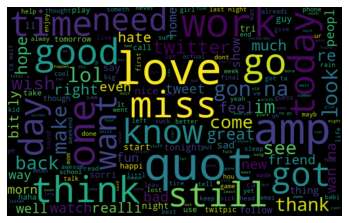

In [32]:
#initializing a wordcloud objec
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Positive words

In [35]:
#freuqent words in positive and negative tweets

In [37]:
#positive words
pos_words=''.join(text for text in data['tokenized_text'][data['target'] == 4])

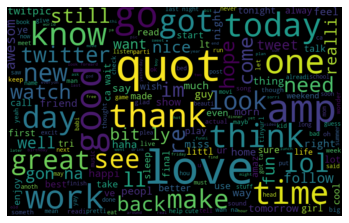

In [39]:
#initializing a wordcloud object for postive words
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(pos_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Logistic Regression for predicting sentiments

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tweets=tfidf_vectorizer.fit_transform(data['tokenized_text'])

In [50]:
#replacing positive value's id '4 with '1'
data['target']=data['target'].replace(4,1)

In [52]:
ratio=int(len(data)*0.75)
ratio

375000

In [56]:
X_train=tweets[:ratio,:]
X_test=tweets[ratio:,:]
y_train=data['target'].iloc[:ratio]
y_test=data['target'].iloc[ratio:]

In [58]:
#initating logistc model
logreg=LogisticRegression(random_state=2)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
prediction = logreg.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy = accuracy_score(y_test,prediction_int)
print(accuracy)

0.705768


In [96]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp=confusion_matrix(y_test,prediction_int).ravel()
tn, fp, fn, tp

(30523, 31791, 4988, 57698)

# Sentiment Analysis using Text blob

In [ ]:
nltk.download('averaged_perceptron_tagger')


In [105]:
# import textblob
from textblob import TextBlob

# convert string to textblob object
text = TextBlob("The alumni network is very strong!")
print(text[:5])

# extract tags
tags = text.tags
print(tags)

# tokenize sentence
tokens = text.words
print(tokens)

text = TextBlob("The alumni network is very strong!")
print(text.sentiment)

The a
[('The', 'DT'), ('alumni', 'JJ'), ('network', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('strong', 'JJ')]
['The', 'alumni', 'network', 'is', 'very', 'strong']
Sentiment(polarity=0.7041666666666667, subjectivity=0.9533333333333333)


In [107]:
tb_polarity=[]
for sentence in data['tokenized_text']:
  temp=TextBlob(sentence)
  #print(temp)
  tb_polarity.append(temp.sentiment[0])

In [109]:
data['tb_polarity']=tb_polarity

In [112]:
data['tb_polarity']

541200     0.500000
750        0.350000
766711    -0.250000
285055    -0.400000
705995     0.000000
             ...   
1085389    0.000000
753135    -0.714286
466554    -0.233333
1471328    0.000000
151092     0.066667
Name: tb_polarity, Length: 500000, dtype: float64

# Sentiment Analysis using vaderSentiment Library

In [117]:
#pip install vaderSentiment

In [124]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# declare sentiment analyser object
analyser = SentimentIntensityAnalyzer()

vs_polarity=[]
for sentence in data['tokenized_text']:
  temp=analyser.polarity_scores(sentence)['compound']
  #print(temp)
  vs_polarity.append(temp)

In [125]:
data['vs_polarity']=vs_polarity

In [127]:
data[['vs_polarity','tb_polarity']]

,vs_polarity,tb_polarity
541200,0.7034,0.500000
750,0.3182,0.350000
766711,-0.0772,-0.250000
285055,-0.5267,-0.400000
705995,-0.4019,0.000000
...,...,...
1085389,0.0000,0.000000
753135,-0.5106,-0.714286
466554,-0.5849,-0.233333
1471328,0.0000,0.000000
